# EDA for nfl_data_py package

## 1.0 Import Data

In [3]:
import nfl_data_py as nfl
import pandas as pd

## 2.0 Play Data

### 2.1 Load Data

In [4]:
years = [2020, 2021, 2022]
pbp = nfl.import_pbp_data(years, cache=False, alt_path=None)

2020 done.
2021 done.
2022 done.
Downcasting floats.


### 2.2 Data size

In [5]:
print(f"Shape: {pbp.shape}")

Shape: (149373, 384)


### 2.3 Columns

In [6]:
pbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149373 entries, 0 to 149372
Columns: 384 entries, play_id to n_defense
dtypes: float64(204), int32(6), int64(1), object(173)
memory usage: 434.2+ MB


In [7]:
for col in nfl.see_pbp_cols():
    print(col)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa


### 2.4 Columns of Importance
In relation to points scored by a team

In [8]:
game_info_cols = [
    'play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'season',
    'posteam', 'defteam',
]

game_state_cols = [
    'game_seconds_remaining', 'qtr', 'down', 'ydstogo', 'yardline_100', 'score_differential'
]

play_result_cols = [
    'yards_gained'
]

target = 'play_type'

cols = game_info_cols + game_state_cols + play_result_cols +  [target]

### 2.4 Random sample

In [9]:
pbp[cols].sample(5)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,season,posteam,defteam,game_seconds_remaining,qtr,down,ydstogo,yardline_100,score_differential,yards_gained,play_type
15905,2163.0,2020_06_KC_BUF,2020101901,BUF,KC,REG,6,2020,KC,BUF,1715.0,3.0,3.0,2.0,72.0,3.0,4.0,run
64181,1568.0,2021_06_LA_NYG,2021101706,NYG,LA,REG,6,2021,LA,NYG,2336.0,2.0,3.0,1.0,3.0,4.0,0.0,run
106048,1526.0,2022_03_GB_TB,2022092512,TB,GB,REG,3,2022,TB,GB,1851.0,2.0,2.0,10.0,40.0,-11.0,14.0,pass
103123,3298.0,2022_02_HOU_DEN,2022091810,DEN,HOU,REG,2,2022,DEN,HOU,762.0,4.0,1.0,10.0,22.0,-3.0,22.0,pass
36392,699.0,2020_14_MIN_TB,2020121307,TB,MIN,REG,14,2020,MIN,TB,2700.0,1.0,NaN,0.0,NaN,0.0,NaN,None


In [10]:
pbp.loc[pbp['game_date'] == '2023-02-12', 'game_id'].unique()

array(['2022_22_KC_PHI'], dtype=object)

### 2.5 Game ID == '2022_22_KC_PHI'

In [11]:
game_id = '2022_22_KC_PHI'
game_condition = pbp['game_id'] == game_id

pd.set_option('display.max_columns', None)
pbp.loc[game_condition, cols].sort_values('play_id').head(15)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,season,posteam,defteam,game_seconds_remaining,qtr,down,ydstogo,yardline_100,score_differential,yards_gained,play_type
149195,1.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,None,None,3600.0,1.0,NaN,0.0,NaN,NaN,NaN,None
149196,41.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3600.0,1.0,NaN,0.0,35.0,0.0,0.0,kickoff
149197,56.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3600.0,1.0,1.0,10.0,75.0,0.0,-1.0,run
149198,86.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3566.0,1.0,2.0,11.0,76.0,0.0,6.0,pass
149199,110.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3524.0,1.0,3.0,5.0,70.0,0.0,12.0,pass
149200,139.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3496.0,1.0,1.0,10.0,58.0,0.0,0.0,pass
149201,161.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3490.0,1.0,2.0,10.0,58.0,0.0,11.0,run
149202,192.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3451.0,1.0,1.0,10.0,47.0,0.0,13.0,pass
149203,216.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3422.0,1.0,1.0,10.0,34.0,0.0,23.0,pass
149204,240.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,2022,PHI,KC,3388.0,1.0,1.0,10.0,11.0,0.0,9.0,run


## 3.0 Baseline Classifier

In [18]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

### 3.1 Split Data

In [19]:
# Split data
pass_or_rush_condition = pbp['play_type'].isin(['pass', 'run'])
y = pbp.loc[pass_or_rush_condition, target]
label_encoder = LabelEncoder().fit(y)
y_enc = label_encoder.fit_transform(y)

print(f"y shape: {y.shape}")
print(f"Targets: {y.unique()}")

y shape: (105434,)
Targets: ['pass' 'run']


### 3.2 Random Model

In [21]:
y_rand = np.random.randint(0, 2, len(y))
print(classification_report(y_enc, y_rand))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54     61587
           1       0.42      0.50      0.45     43847

    accuracy                           0.50    105434
   macro avg       0.50      0.50      0.50    105434
weighted avg       0.52      0.50      0.51    105434



## 4.0 Best Splits

In [34]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

### 4.1 Split Data

In [23]:
# Split data
pass_or_rush_condition = pbp['play_type'].isin(['pass', 'run'])
X = pbp.loc[pass_or_rush_condition, game_state_cols]
y = pbp.loc[pass_or_rush_condition, target]
label_encoder = LabelEncoder().fit(y)
y_enc = label_encoder.fit_transform(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Features: {list(X.columns)}")
print(f"Targets: {y.unique()}")

X shape: (105434, 6)
y shape: (105434,)
Features: ['game_seconds_remaining', 'qtr', 'down', 'ydstogo', 'yardline_100', 'score_differential']
Targets: ['pass' 'run']


### 4.2 Decision Tree

In [28]:
# Hypertune parameters
params = {
    'max_depth': [7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    'min_samples_leaf': [10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275],
    'max_leaf_nodes': [50, 75, 100, 125, 150],
    'random_state': [42]
}

# Randomized search w/ cross validation
dt = DecisionTreeClassifier()
dt_cv = RandomizedSearchCV(
    dt, 
    params, 
    cv=5, 
    n_jobs=-1, 
    n_iter=50,
    verbose=1, 
    scoring=['accuracy', 'recall', 'precision', 'f1'],
    refit='f1'
)
dt_cv.fit(X, y_enc)
print(f"Best score: {dt_cv.best_score_}")
dt_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best score: 0.6230657931969874


DecisionTreeClassifier(max_depth=17, max_leaf_nodes=150, min_samples_leaf=175,
                       random_state=42)

### 4.3 Split Rules

In [39]:
clf = dt_cv.best_estimator_
tree_rules = export_text(clf, feature_names=game_state_cols)
print(tree_rules)

|--- down <= 2.50
|   |--- score_differential <= -7.50
|   |   |--- game_seconds_remaining <= 626.50
|   |   |   |--- score_differential <= -24.50
|   |   |   |   |--- ydstogo <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ydstogo >  7.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- score_differential >  -24.50
|   |   |   |   |--- yardline_100 <= 4.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- yardline_100 >  4.50
|   |   |   |   |   |--- game_seconds_remaining <= 316.50
|   |   |   |   |   |   |--- yardline_100 <= 75.50
|   |   |   |   |   |   |   |--- yardline_100 <= 66.50
|   |   |   |   |   |   |   |   |--- yardline_100 <= 55.50
|   |   |   |   |   |   |   |   |   |--- yardline_100 <= 43.50
|   |   |   |   |   |   |   |   |   |   |--- down <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- down >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of

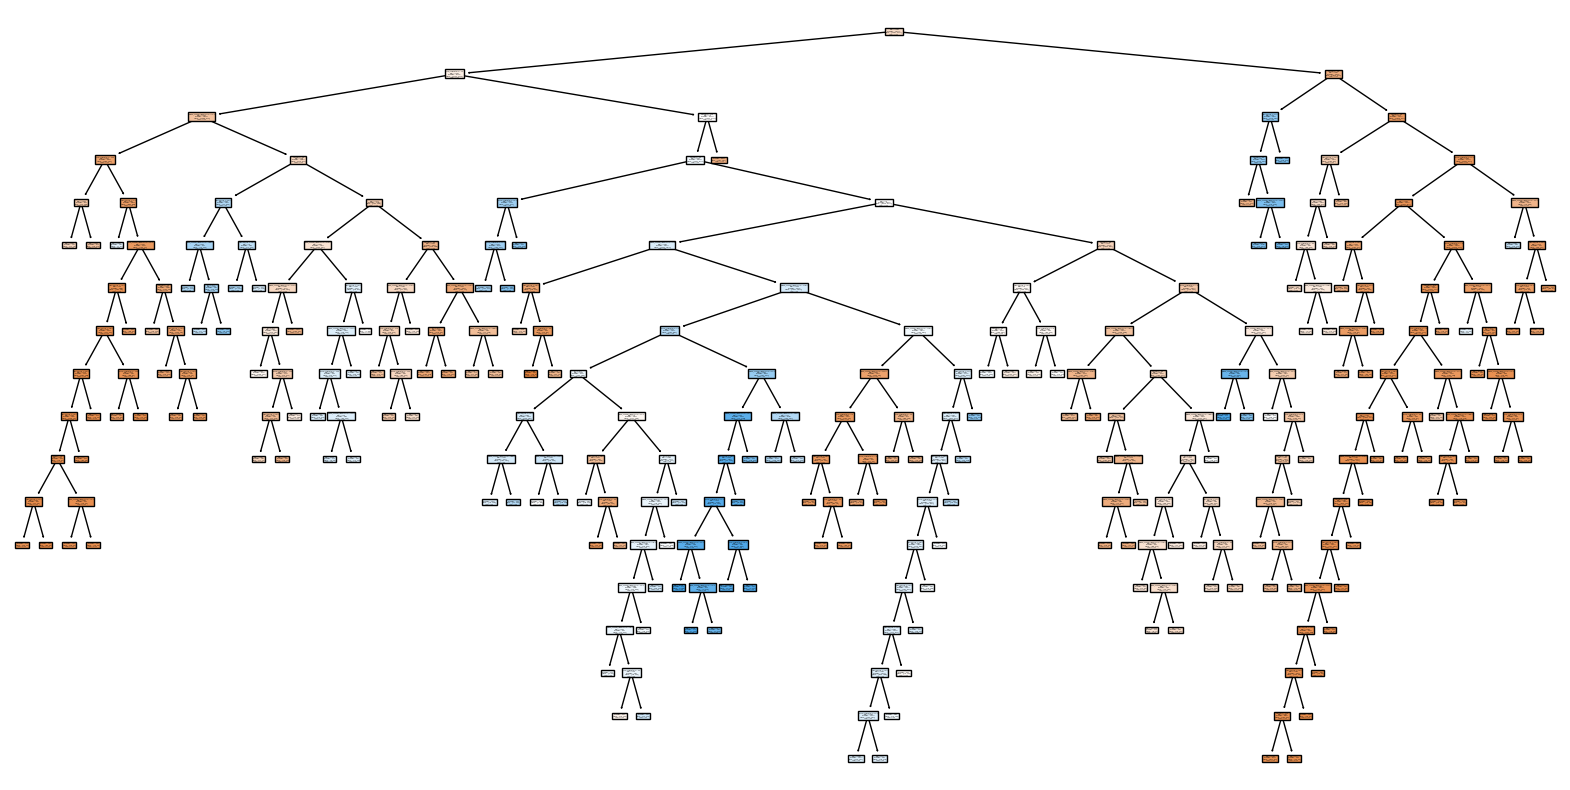

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=game_state_cols, class_names=list(label_encoder.classes_), filled=True)
plt.show()